# Credit Score Classification : Basic Example Notebook

This is an example notebook for the FML Kaggle Challenge. Here are some basic steps to preprocess, train et generate predictions.
### Caution: Some of the steps here are just explanatories, you will still need to change and add steps to perform well in the challenge 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [16]:
train_data = pd.read_csv('/Users/jojolapatate/Documents/M2 ESSEC CENTRALE/FML/Assignment2/train_set.csv', index_col= 0)
test_data = pd.read_csv('/Users/jojolapatate/Documents/M2 ESSEC CENTRALE/FML/Assignment2/test_set.csv', index_col= 0)

## Selecting Features and Encoding

In this example, we only consider numerical values but some categorical values might be of help

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE



In [120]:
#FIT NORMAL MODEL TO GET FEATURE IMPORTANCE
X_train = train_data.drop(columns=[ 'Customer_ID', "Name", 'SSN', 'Credit_Score', 'Type_of_Loan'])
y_train = train_data['Credit_Score']
label_encoder = LabelEncoder()
feature_encoder = OrdinalEncoder()

#ENCODE 
y_train = label_encoder.fit_transform(y_train).astype(int)
X_train[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']] = feature_encoder.fit_transform(X_train[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']])



0.9999857142857143
These are the cross validation scores for [0.81692857 0.81228571 0.80992857 0.81442857 0.81807143]


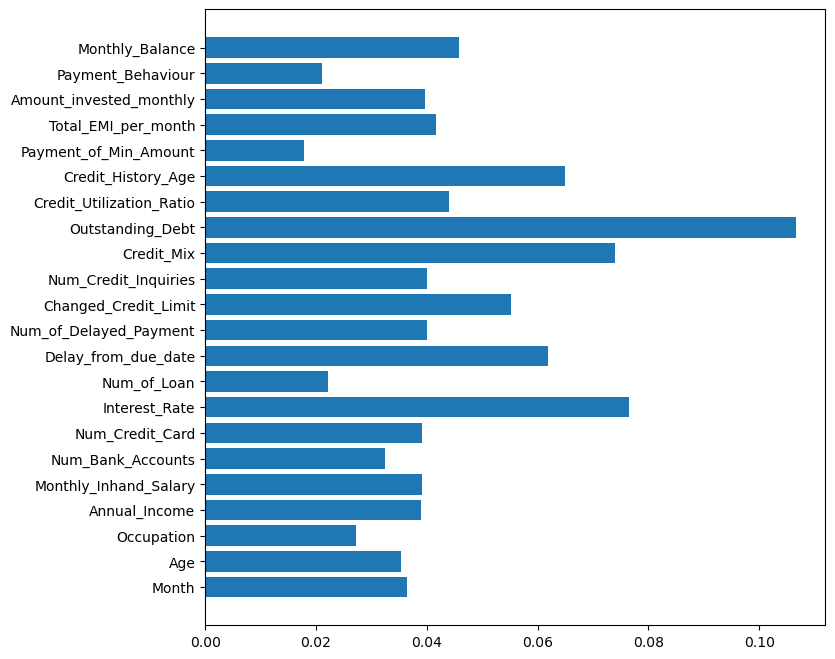

In [6]:
#CHECK FEATURE IMPORTANCE, keeping all features with a baseline RF model
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
y_train_pred = RF.predict(X_train)
print(accuracy_score(y_train_pred, y_train))

kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
scores = cross_val_score(RF, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores for {scores}')

plt.figure(figsize=(8, 8))
plt.barh(X_train.columns, RF.feature_importances_)

plt.show()

In [43]:
combined_data = pd.concat([train_data, test_data], axis=0) 
income_occupation = combined_data.groupby('Occupation')['Annual_Income'].mean()
income_occupation= pd.DataFrame(income_occupation_train)

income_occupation.sort_values('Annual_Income')

,Annual_Income
Occupation,
Journalist,48823.694626
Lawyer,49293.053059
Doctor,49562.868161
Teacher,49637.266524
Mechanic,50047.594727
Developer,50379.712131
Engineer,50550.326035
Accountant,50593.898236
Media_Manager,50680.185246


In [121]:
def one_hot_encoding_loan_type(df):

        loan_types = df['Type_of_Loan'].str.split(',', expand=True)

        # Get all unique loan types
        unique_loan_types = loan_types.stack().unique()

        # Create a new DataFrame to store loan type counts
        loan_counts = pd.DataFrame(index=df.index)

        # Iterate over unique loan types and count occurrences
        for loan_type in unique_loan_types:
            loan_counts[loan_type] = loan_types.apply(lambda row: row.str.contains(loan_type).sum(), axis=1)

        # Display the DataFrame with loan type counts
        loan_counts = pd.DataFrame(loan_counts)

        df = pd.concat([df, loan_counts], axis=1)
        df = df.drop(columns=['No Data', 'not specified'])
        return df

train = one_hot_encoding_loan_type(train_data)
test = one_hot_encoding_loan_type(test_data)

KeyboardInterrupt: 

In [4]:
def preprocess(train, test):


    #Drop unnecessary columns : Customer_id, Name, SSN,
    train_data_filter = train.drop(columns=[ "Name", 'SSN','Type_of_Loan'])
    test_data_filter = test.drop(columns=["Name", 'SSN', 'Type_of_Loan' ])


    #Adding feature interaction:
    train_data_filter['boost'] = train_data_filter['Credit_Mix']+'-'+train_data_filter['Payment_of_Min_Amount']+'-'+train_data_filter['Payment_Behaviour']
    test_data_filter['boost'] = test_data_filter['Credit_Mix']+'-'+test_data_filter['Payment_of_Min_Amount']+'-'+test_data_filter['Payment_Behaviour']

    #dummy_boost_train = pd.get_dummies(train_data_filter['boost'], prefix='boost')
    #dummy_boost_test = pd.get_dummies(test_data_filter['boost'], prefix='boost')


# Concatenate the dummy variables with the original DataFrame
    #train_data_filter = pd.concat([train_data_filter, dummy_boost_train], axis=1)
    #test_data_filter = pd.concat([test_data_filter, dummy_boost_test], axis=1)

    train_data_filter['income_age'] = train_data_filter['Annual_Income']*train_data_filter['Age']
    test_data_filter['income_age'] = test_data_filter['Annual_Income']*test_data_filter['Age']

    test_data_filter['card_bank'] = test_data_filter['Num_Bank_Accounts']*test_data_filter['Num_Credit_Card']
    train_data_filter['card_bank'] = train_data_filter['Num_Bank_Accounts']*train_data_filter['Num_Credit_Card']

    train_data_filter['DTI_ratio'] = (train_data_filter['Outstanding_Debt']/train_data_filter['Annual_Income'])*100
    test_data_filter['DTI_ratio'] = (test_data_filter['Outstanding_Debt']/test_data_filter['Annual_Income'])*100

    train_data_filter['ITS_ratio'] = (train_data_filter['Amount_invested_monthly']/train_data_filter['Monthly_Inhand_Salary'])*100
    test_data_filter['ITS_ratio'] = (test_data_filter['Amount_invested_monthly']/test_data_filter['Monthly_Inhand_Salary'])*100

    train_data_filter['Instalments_to_Salary'] = ((train_data_filter['Total_EMI_per_month']*12)/train_data_filter['Annual_Income'])*100
    test_data_filter['Instalments_to_Salary'] = ((test_data_filter['Total_EMI_per_month']*12)/test_data_filter['Annual_Income'])*100
    
    train_data_filter['Debt_over_time'] = ((train_data_filter['Outstanding_Debt'])/train_data_filter['Credit_History_Age'])
    test_data_filter['Debt_over_time'] = ((test_data_filter['Outstanding_Debt'])/test_data_filter['Credit_History_Age'])
    
    train_data_filter['Interest_Debt'] = ((train_data_filter['Interest_Rate']/100)*train_data_filter['Outstanding_Debt'])
    test_data_filter['Interest_Debt'] = ((test_data_filter['Interest_Rate']/100)*test_data_filter['Outstanding_Debt'])
    
    train_data_filter['Interest_time'] = ((train_data_filter['Interest_Rate'])/train_data_filter['Credit_History_Age'])
    test_data_filter['Interest_time'] = ((test_data_filter['Interest_Rate'])/test_data_filter['Credit_History_Age'])

    #train_data_filter['credit_hist_bin'] = train_data_filter['Credit_History_Age'].apply(lambda x: 0 if x<200 else 2)
    #test_data_filter['credit_hist_bin'] = test_data_filter['Credit_History_Age'].apply(lambda x: 0 if x<200 else 2)

    train_data_filter['debt_bin'] = train_data_filter['Outstanding_Debt'].apply(lambda x: 2 if x<1500 else 0)
    test_data_filter['debt_bin'] = test_data_filter['Outstanding_Debt'].apply(lambda x: 2 if x<1500 else 0)

    #train_data_filter['due_bin'] = train_data_filter['Delay_from_due_date'].apply(lambda x: 2 if x<17 else 0)
    #test_data_filter['due_bin'] = test_data_filter['Delay_from_due_date'].apply(lambda x: 2 if x<17 else 0)

    train_data_filter['delays'] = train_data_filter['Delay_from_due_date']+train_data_filter['Num_of_Delayed_Payment']
    test_data_filter['delays'] = test_data_filter['Delay_from_due_date']+test_data_filter['Num_of_Delayed_Payment']

    #train_data_filter['delay_bin'] = train_data_filter['Delay_from_due_date'].apply(lambda x: 2 if x<13 else 0)
    #test_data_filter['delay_bin'] = test_data_filter['Delay_from_due_date'].apply(lambda x: 2 if x<13 else 0)

    #train_data_filter['creditbin'] = train_data_filter['Num_Credit_Inquiries'].apply(lambda x: 2 if x<5 else 0)
    #test_data_filter['creditbin'] = test_data_filter['Num_Credit_Inquiries'].apply(lambda x: 2 if x<5 else 0)

    #train_data_filter['loanbin'] = train_data_filter['Num_of_Loan'].apply(lambda x: 2 if x<5 else 0)
    #test_data_filter['loanbin'] = test_data_filter['Num_of_Loan'].apply(lambda x: 2 if x<5 else 0)

    #train_data_filter['intrbin'] = train_data_filter['Interest_Rate'].apply(lambda x: 2 if x<13 else 0)
    #test_data_filter['intrbin'] = test_data_filter['Interest_Rate'].apply(lambda x: 2 if x<13 else 0)

    #train_data_filter['cardbin2'] = train_data_filter['Num_Credit_Card'].apply(lambda x: 2 if x<5 else 0)
    #test_data_filter['cardbin2'] = test_data_filter['Num_Credit_Card'].apply(lambda x: 2 if x<5 else 0)

    #train_data_filter['incomebin'] = train_data_filter['Annual_Income'].apply(lambda x: 0 if x<20000 else 2)
    #test_data_filter['incomebin'] = test_data_filter['Annual_Income'].apply(lambda x: 0 if x<20000 else 2)

    #train_data_filter['bankbin'] = train_data_filter['Num_Credit_Card'].apply(lambda x: 2 if x<5 else 0)
    #test_data_filter['bankbin'] = test_data_filter['Num_Credit_Card'].apply(lambda x: 2 if x<5 else 0)
    
    #train_data_filter['changbin'] = train_data_filter['Changed_Credit_Limit'].apply(lambda x: 0 if x<12 else 2)
    #test_data_filter['changbin'] = test_data_filter['Changed_Credit_Limit'].apply(lambda x: 0 if x<12 else 2)

    train_data_filter['sdbankbin'] = train_data_filter['Changed_Credit_Limit'].apply(lambda x: 1 if x>2 and x<9 else 0)
    test_data_filter['sdbankbin'] = test_data_filter['Changed_Credit_Limit'].apply(lambda x: 1 if x>2 and x<9 else 0)

    train_data_filter['sdcardbin'] = train_data_filter['Num_Credit_Card'].apply(lambda x: 1 if x>2 and x<9 else 0)
    test_data_filter['sdcardbin'] = test_data_filter['Num_Credit_Card'].apply(lambda x: 1 if x>2 and x<9 else 0)

    #train_data_filter['sdir'] = train_data_filter['Interest_Rate'].apply(lambda x: 1 if x>4 and x<21 else 0)
    #test_data_filter['sdir'] = test_data_filter['Interest_Rate'].apply(lambda x: 1 if x>4 and x<21 else 0)

    train_data_filter['sdloan'] = train_data_filter['Num_of_Loan'].apply(lambda x: 1 if x<5 else 0)
    test_data_filter['sdloan'] = test_data_filter['Num_of_Loan'].apply(lambda x: 1 if x<5 else 0)

    #train_data_filter['sddelayed'] = train_data_filter['Num_of_Delayed_Payment'].apply(lambda x: 1 if x>6 and x<20 else 0)
    #test_data_filter['sddelayed'] = test_data_filter['Num_of_Delayed_Payment'].apply(lambda x: 1 if x>6 and x<20 else 0)

    train_data_filter['sd_debt_bin'] = train_data_filter['Outstanding_Debt'].apply(lambda x: 1 if x<1500 else 0)
    test_data_filter['sd_debt_bin'] = test_data_filter['Outstanding_Debt'].apply(lambda x: 1 if x<1500 else 0)


    #train_data_filter['sd_history'] = train_data_filter['Credit_History_Age'].apply(lambda x: 1 if x>180 and x<240 else 0)
    #test_data_filter['sd_history'] = test_data_filter['Credit_History_Age'].apply(lambda x: 1 if x>180 and x<240 else 0)

    #Encode rest of variables
    
    desired_categories = [['Poor', 'Standard', 'Good']]
    feature_encoder = OrdinalEncoder(categories = desired_categories)
    y_train = feature_encoder.fit_transform(train_data_filter[['Credit_Score']]).ravel()

    desired_categories_2 = ['Bad', 'Standard', 'Good']
    feature_encoder_2 = OrdinalEncoder(categories = [desired_categories_2])
    train_data_filter[ 'Credit_Mix'] = feature_encoder_2.fit_transform(train_data_filter[ 'Credit_Mix'].values.reshape(-1, 1))  
    test_data_filter[ 'Credit_Mix'] = feature_encoder_2.fit_transform(test_data_filter[ 'Credit_Mix'].values.reshape(-1, 1)) 


    #Occupation ranked from highest to lowest annual income on all data
    desired_categories_3 = ['Musician', 'Writer', 'Manager', 'Architect' , 'Scientist', 'Entrepreneur', 'Media_Manager', 'Accountant',\
                             'Engineer', 'Developer', 'Mechanic', 'Teacher', 'Doctor' ,'Lawyer', 'Journalist']
    feature_encoder_3 = OrdinalEncoder(categories = [desired_categories_3])
    train_data_filter['Occupation'] = feature_encoder_3.fit_transform(train_data_filter['Occupation'].values.reshape(-1, 1))
    test_data_filter['Occupation'] = feature_encoder_3.fit_transform(test_data_filter['Occupation'].values.reshape(-1, 1))


    label_encoder = LabelEncoder()

    train_data_filter['Payment_Behaviour'] = label_encoder.fit_transform(train_data_filter['Payment_Behaviour'])
    train_data_filter[ 'Payment_of_Min_Amount'] = label_encoder.fit_transform(train_data_filter[ 'Payment_of_Min_Amount']) 
    train_data_filter[ 'boost'] = label_encoder.fit_transform(train_data_filter[ 'boost']) 

  
    test_data_filter[ 'Payment_of_Min_Amount'] = label_encoder.fit_transform(test_data_filter[ 'Payment_of_Min_Amount']) 
    test_data_filter['Payment_Behaviour'] = label_encoder.fit_transform(test_data_filter['Payment_Behaviour'])
    test_data_filter['boost'] = label_encoder.fit_transform(test_data_filter['boost'])


    #Define X_train, X_test
    X_train = train_data_filter.drop(columns = 'Credit_Score' )
    X_test = test_data_filter
    X_test = X_test[X_train.columns]
    
    #Normalize
    def normalize(X_train, X_test):
        scaler = preprocessing.StandardScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
        
        return X_train_scaled_df, X_test_scaled_df

    X_train, X_test= normalize(X_train, X_test)

    
    return X_train, y_train, X_test, feature_encoder

In [6]:
X_train, y_train, X_test, feature_encoder = preprocess(train_data, test_data)


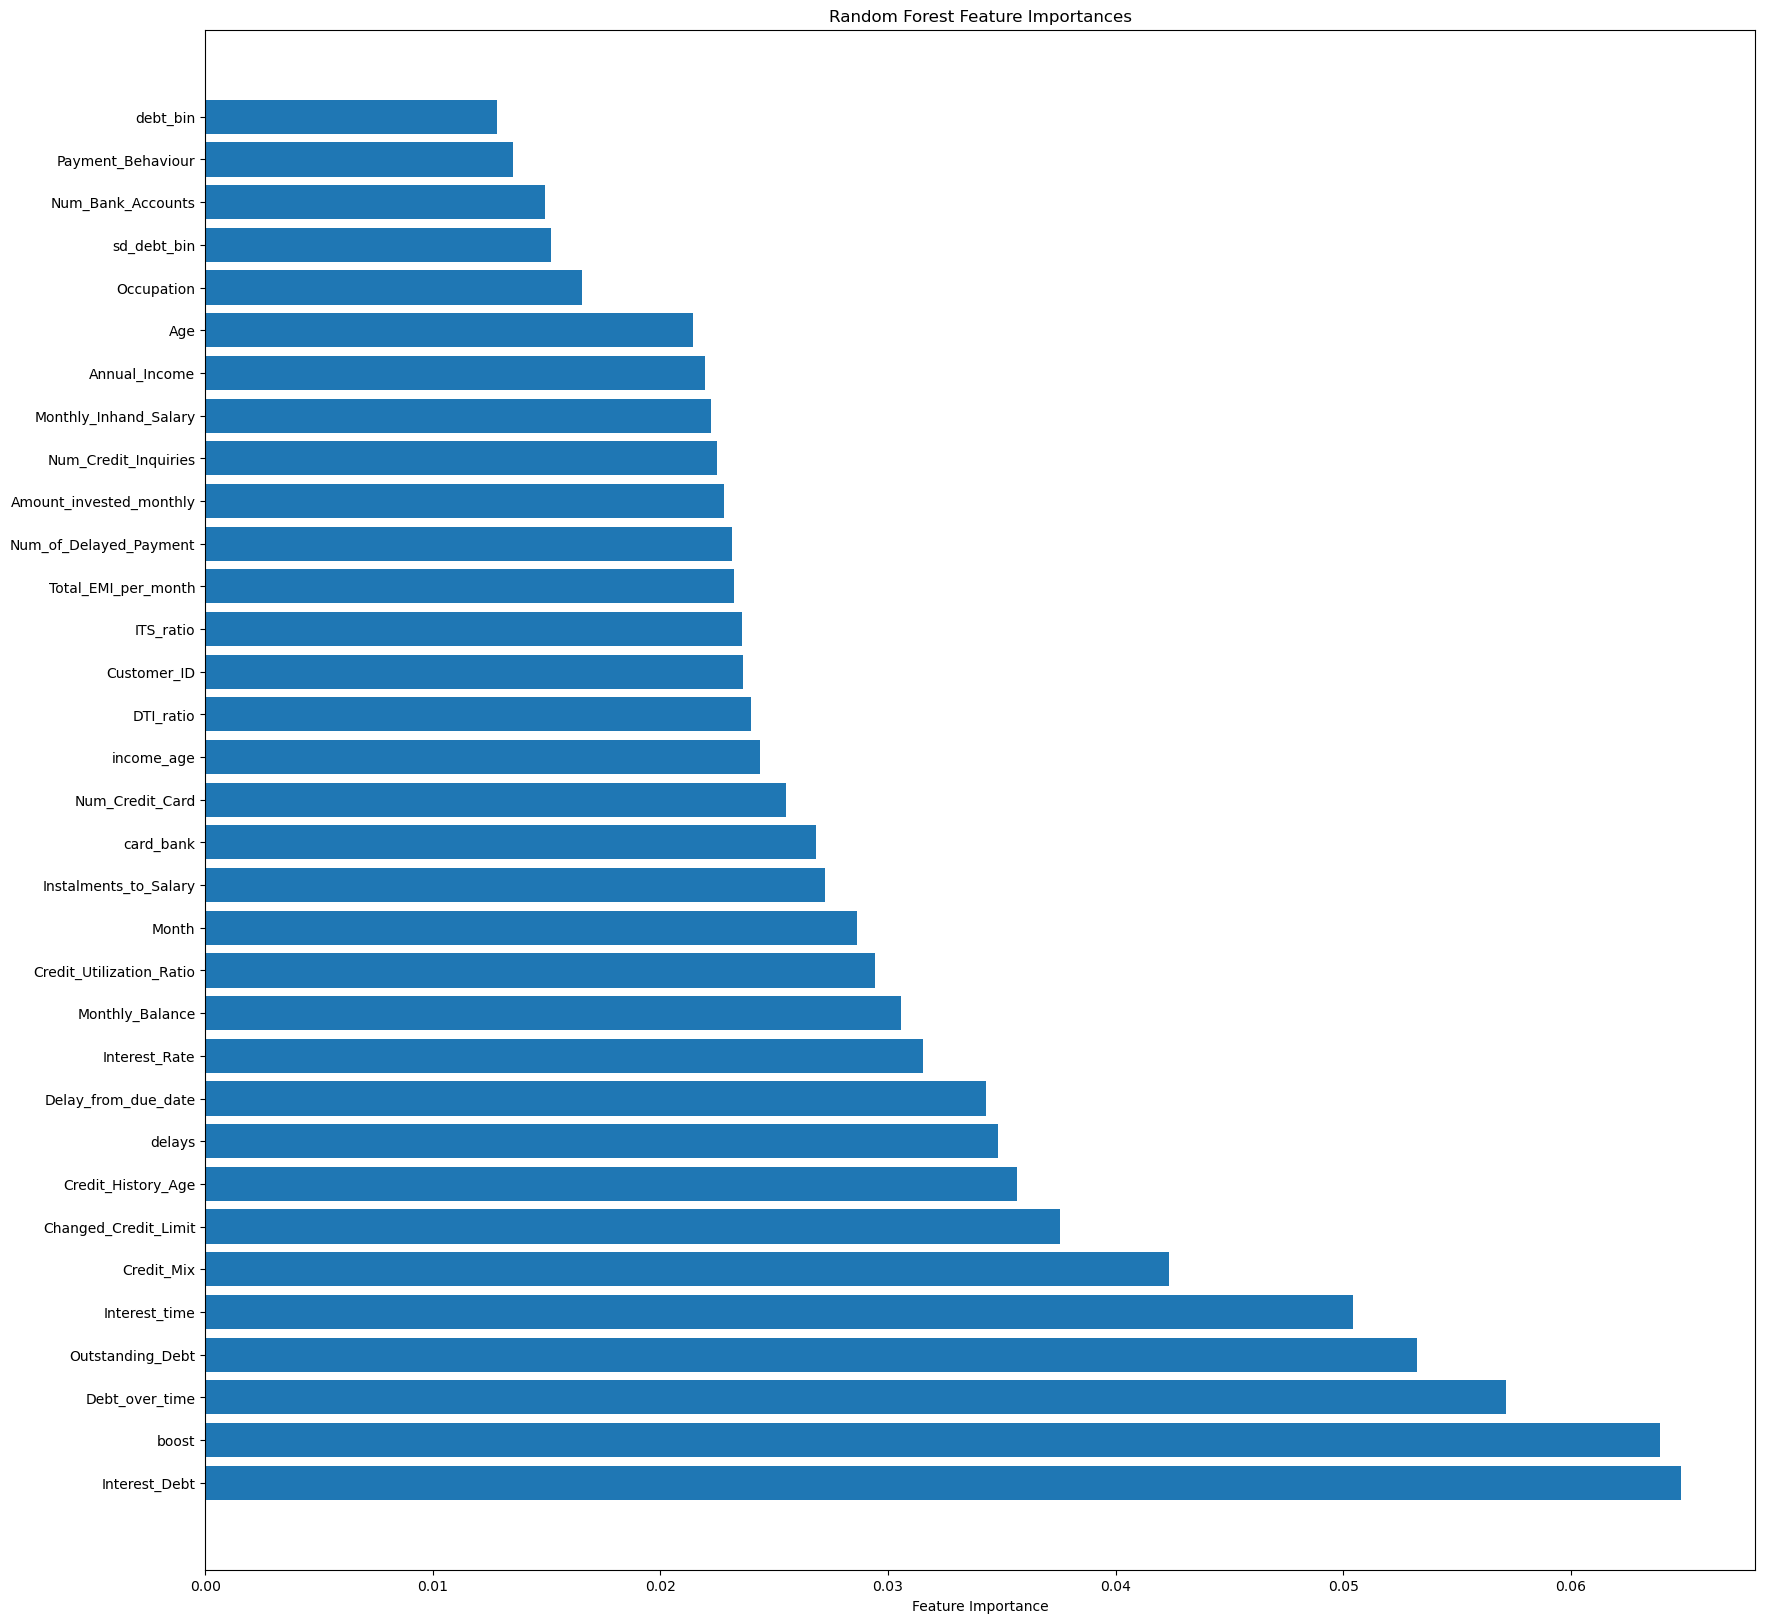

In [116]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming RF is a trained RandomForestClassifier and X_train contains your features
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)

# Pair feature importances with their respective column names
feature_importances = list(zip(X_train.columns, RF.feature_importances_))

# Sort feature importances based on their importance scores
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Separate feature names and importance scores after sorting
sorted_features, sorted_importances = zip(*feature_importances)

# Plotting the sorted feature importances
plt.figure(figsize=(20, 20))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [126]:
model = make_pipeline(RandomForestClassifier(criterion= 'entropy',random_state=0, n_jobs=-1))
kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle = True)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores {scores}')
#[0.81619097 0.81215446 0.81781168]

These are the cross validation scores [0.81619097 0.81215446 0.81781168]


In [ ]:
perf_models = {}
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)

kneighbors = KNeighborsClassifier()
kneighbors.fit(X_train, y_train)
perf_models['K-Neighbors'] = cross_val_score(kneighbors, X_train, y_train, cv=kfold).mean()

GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(X_train, y_train)
perf_models['GradientBoosting'] = cross_val_score(GradientBoosting, X_train, y_train, cv=kfold).mean()


Adaboost = AdaBoostClassifier()
Adaboost.fit(X_train, y_train)
perf_models['Adaboost'] = cross_val_score(Adaboost, X_train, y_train, cv=kfold).mean()


Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)
perf_models['Random_Forest'] = cross_val_score(Random_Forest, X_train, y_train, cv=kfold).mean()


Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
perf_models['Decision_Tree'] = cross_val_score(Decision_Tree, X_train, y_train, cv=kfold).mean()

lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train)
perf_models['lgb'] = cross_val_score(Adaboost, X_train, y_train, cv=kfold).mean()

models = pd.DataFrame(list(perf_models.items()), columns=['Model', 'Test Score'])

# Sort the DataFrame by 'Training Score' column in descending order
models = models.sort_values(by='Test Score', ascending=False)
models

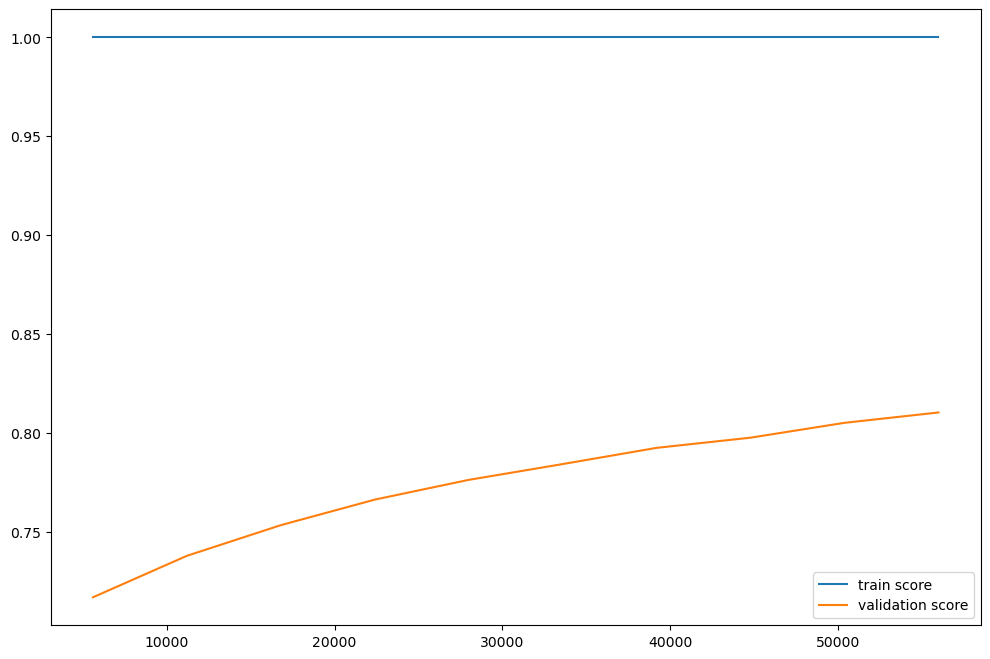

In [13]:
#LEARNING CURVE

RF= RandomForestClassifier(random_state= 0)
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)

def evaluation(model):
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=kfold, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

evaluation(RF)

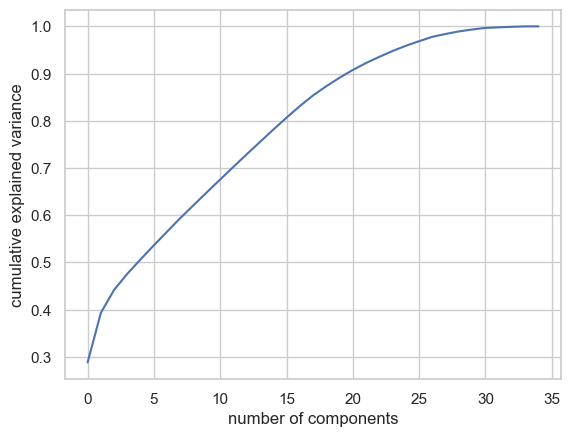

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.288227,0.288227
1,0.393189,0.104961
2,0.441912,0.048724
3,0.476134,0.034222
4,0.506648,0.030514
5,0.536349,0.029701
6,0.565441,0.029091
7,0.594238,0.028797
8,0.621600,0.027362
9,0.648779,0.027179


In [10]:
#PCA
pca_test = PCA(n_components=35)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(35))

## Optimize Parameters

We established PCA was useless and that our model wasn't overfitting; Now we want to optimize parameters to improve test accuracy, which is around 80% with baseline model

In [ ]:
#Randomized search to add to optimize hyperparameter
kfold = StratifiedKFold(n_splits=2, random_state=42, shuffle = True)
model = RandomForestClassifier(random_state=0)

space = dict()
space['n_estimators'] = [int(x) for x in np.linspace(start = 800, stop = 2000, num = 20)]
space['max_features'] = [4, 5, 6]
space['max_depth']= [20, 30, 80]
space['min_samples_split'] : [2, 5, 7]

search = RandomizedSearchCV(model, space, scoring = 'accuracy', n_iter= 50,cv = kfold, refit = True)
result = search.fit(X_train, y_train)

# Obtain the best parameters
best_params = result.best_params_
print("Best Parameters:", best_params)

#Best Parameters: {'n_estimators': 1873, 'max_features': 6, 'max_depth': 80}


In [101]:
rs_df = pd.DataFrame(result.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_max_features,param_max_depth,mean_test_score,rank_test_score
0,1873,6,80,0.792914,1
1,863,5,80,0.792643,2
2,1052,5,80,0.792571,3
3,1431,6,80,0.792357,4
4,1305,6,80,0.792257,5
5,1242,6,80,0.792243,6
6,1873,6,30,0.792143,7
7,1684,5,80,0.792129,8
8,1115,6,80,0.792086,9
9,1936,5,80,0.792071,10


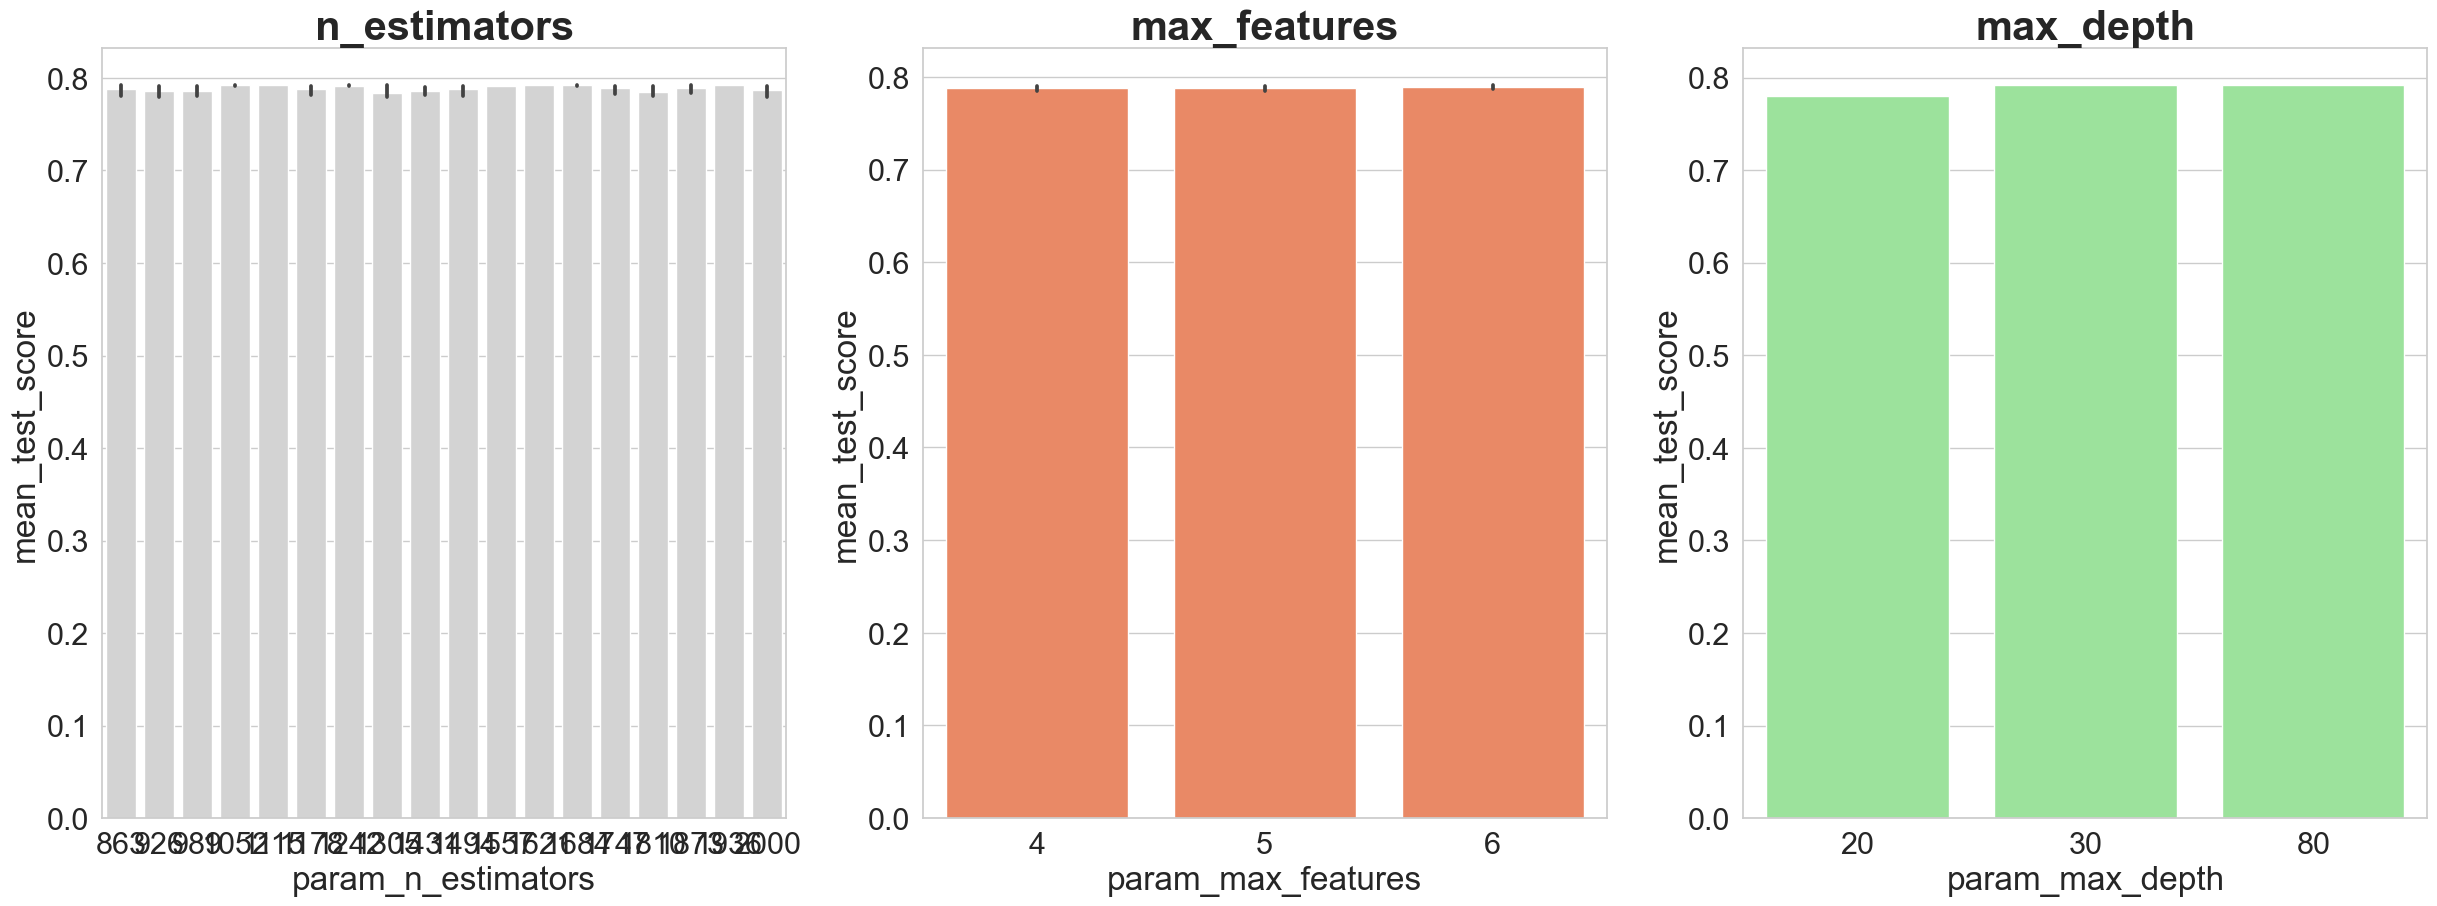

In [111]:
fig, axs = plt.subplots(ncols=3, nrows=1)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,10)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0], color='lightgrey')

axs[0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1], color='coral')

axs[1].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[2], color='lightgreen')

axs[2].set_title(label = 'max_depth', size=30, weight='bold')

plt.show()

In [ ]:
kfold = StratifiedKFold(n_splits=2, random_state=42, shuffle = True)
model = RandomForestClassifier(random_state=0)

space = dict()
space['n_estimators'] = [1000]
space['max_features'] = [4, 5]
space['min_samples_split'] = [2, 3, 4]
space['min_samples_leaf'] = [1, 2, 3]
search = GridSearchCV(model, space, scoring = 'accuracy',cv = kfold, refit = True)
result = search.fit(X_train, y_train)

# Obtain the best parameters
best_params = result.best_params_
print("Best Parameters:", best_params)

#Best Parameters: {'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


## Evaluation

In [13]:
unique_values, counts = np.unique(y_train_train, return_counts=True)
print(dict(zip(unique_values, counts)))

{0.0: 17291, 1.0: 31511, 2.0: 10698}


In [12]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.15)

In [14]:
SVMSMT = SVMSMOTE(random_state=42, sampling_strategy= {0.0: 17291, 1.0: 35000, 2.0: 17291})

X_train_train, y_train_train = SVMSMT.fit_resample(X_train_train,y_train_train)

In [9]:
model = make_pipeline(RandomForestClassifier(criterion= 'log_loss',random_state=0, n_estimators= 800, max_features = 5, n_jobs=-1))
model.fit(X_train_train, y_train_train)
y_pred = model.predict(X_train_test)
accuracy_score(y_pred, y_train_test)
#0.8320952380952381

0.8296190476190476

In [10]:
from sklearn.metrics import accuracy_score, recall_score, classification_report
print(classification_report(y_pred, y_train_test))
#best was 40k for 1, 20k for 0 and 25k for 1 
#led to 84% for 0, 83% for 1 and 82% for 2

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.83      3397
         1.0       0.80      0.87      0.84      5158
         2.0       0.84      0.77      0.80      1945

    accuracy                           0.83     10500
   macro avg       0.84      0.81      0.82     10500
weighted avg       0.83      0.83      0.83     10500



In [13]:
from sklearn.ensemble import HistGradientBoostingClassifier
kfold = StratifiedKFold(n_splits=2, random_state=42, shuffle = True)

mod = HistGradientBoostingClassifier(min_samples_leaf=26, l2_regularization=9e-1,\
                                      max_iter=1000, random_state=42,loss='log_loss', learning_rate=1e-1, n_iter_no_change=30)
scores = cross_val_score(mod, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores {scores}')

These are the cross validation scores [0.78397143 0.78708571]


In [14]:
model = make_pipeline(RandomForestClassifier(criterion= 'log_loss',random_state=0, n_estimators= 800, max_features = 6, n_jobs=-1))
kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle = True)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores {scores}')

#Best scores with RF : 0.8189766  0.81682595 0.82158317]
model = RandomForestClassifier(criterion= 'entropy', max_depth=13, n_estimators=200) # for feature importance


These are the cross validation scores [0.81803377 0.81772597 0.82201174]


In [ ]:
#LIGHTGBM EVAL
import lightgbm as lgb
lgb = lgb.LGBMClassifier(random_state= 0, boosting_type= 'gbdt', learning_rate= 0.2,n_estimators=200, num_leaves= 90, objective= 'multiclass', class_weight = 'balanced', n_jobs = -1)
kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle = True)
scores = cross_val_score(lgb, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores {scores}')

#0.81889089 0.81811169 0.82059744

In [15]:
#ExtraTree Eval
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)
scores = cross_val_score(ET, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores {scores}')


These are the cross validation scores [0.81529099 0.81369734 0.81588308]


## Generating the Submission

Below you will find a function that does the predictions for the test set and generates a submission, this submission is to be uploaded to kaggle to update the leaderboard

In [30]:
X_train, y_train = SVMSMT.fit_resample(X_train,y_train)
model = make_pipeline(RandomForestClassifier(criterion= 'log_loss',random_state=0, n_estimators= 1000, max_features = 6, n_jobs=-1))
model.fit(X_train, y_train)


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss', max_features=6,
                                        n_estimators=1000, n_jobs=-1,
                                        random_state=0))])

In [31]:
def generate_submission(X_test):
    list_of_predictions = model.predict(X_test)
    label_map = {0: 'Poor', 1: 'Standard', 2: 'Good'}

# Replace numeric values with corresponding labels using the map
    mapped_labels = [label_map[val] for val in list_of_predictions]
    df = pd.DataFrame({'Credit_Score': mapped_labels}, index=X_test.index)
    df.to_csv('/Users/jojolapatate/Documents/M2 ESSEC CENTRALE/FML/Assignment2/sandbox_submission.csv')
    
    

In [32]:
generate_submission(X_test)


In [ ]:
#to add
#confusion matrix, gridsearchCV better made,
#try log transform instead of standard scaler
#try one hot encding
